In [ ]:
#from google.colab import drive
# drive.mount('/content/drive')


Mounted at /content/drive


SENTIMENT ANALYSIS ON GOOGLE APP REVIEWS ON TOP 10 FINTECH STARTUPS IN AFICA WITH MACHINE LEARNING AND DEEP LEARNING


INSTALL SOME OF THE LIBRARIES REQUIRED 



In [1]:
%pip install -qq google-play-scraper

In [32]:
%pip install pycountry

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [39]:
# import the necessary modules
import json
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from pygments import highlight
from pygments.formatters import TerminalFormatter
from pygments.lexers import JsonLexer

from tqdm import tqdm
import pycountry as py

from google_play_scraper import Sort, reviews, app

%matplotlib inline
sns.set(style = 'whitegrid', palette = 'muted')


In [64]:
name_of_fintech = ['Flutter wave',  'Opay', 'Palm Pay', 'Chipper Cash', 'Interswitch', 'PiggyVest', 'Paga',  'Kuda bank' ]
countries = ['Nigeria','Kenya', 'Ghana', 'South Africa']
app_package_id = [
               'com.flutterwave.flybarter',
               'team.opay.pay',
               'com.transsnet.palmpay',
               'com.chippercash',
               'com.quickteller.app',
               'com.piggybankng.piggy',
               'com.mypaga.customer',
               'com.kudabank.app'
]

In [73]:
data = []
for ap in tqdm(app_package_id):
  value = []
  for country in countries:
    ccode = py.countries.search_fuzzy(country)[0].alpha_2.lower()
    var = app(ap, lang = 'en', country = ccode)
    value.append(var['reviews'])
  data.append(value)


100%|██████████| 8/8 [00:07<00:00,  1.11it/s]


In [74]:
df = pd.DataFrame(data, columns = countries, index = name_of_fintech)

In [75]:
df

,Nigeria,Kenya,Ghana,South Africa
Flutter wave,4357,184,270,24
Opay,108649,12,135,14
Palm Pay,76013,6,2993,14
Chipper Cash,21775,4711,2186,1827
Interswitch,1882,0,6,0
PiggyVest,25052,9,61,24
Paga,4583,0,17,3
Kuda bank,66113,5,122,51


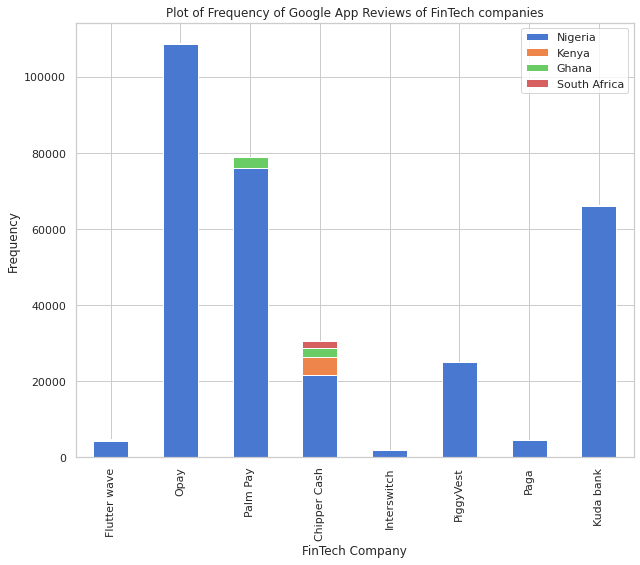

In [76]:
new_df = df.copy()
new_df.fillna(0, inplace = True)
new_df.plot.bar(stacked = True,
                title ='Plot of Frequency of Google App Reviews of FinTech companies',
                ylabel = 'Frequency',
                xlabel = 'FinTech Company',
                figsize = (10,8))



From the plot above it was shown that Nigeria has the most reviews for each of the FInTech app in Google Play Store.
Therefore, I will scrape only the reviews in the country

Info about the app

In [77]:
app_infos = []

for ap in tqdm(app_package_id):
  info = app(ap, lang= 'en', country = 'ng')
  del info['comments']
  app_infos.append(info)

100%|██████████| 8/8 [00:01<00:00,  7.18it/s]


In [78]:
# function to beautify the json response from the reviews
def print_json(json_object):
  json_str = json.dumps(
      json_object,
      indent = 2,
      sort_keys = True,
      default=str
  )
  print(highlight(json_str, JsonLexer(), TerminalFormatter()))

In [79]:
# print the info of the last app : Kuda Bank
print_json(app_infos[-1])

{
  "adSupported": false,
  "appId": "com.kudabank.app",
  "containsAds": false,
  "contentRating": "Rated for 3+",
  "contentRatingDescription": null,
  "currency": "NGN",
  "description": "Welcome to your freedom!\r\n\r\nKuda - the bank that doesn't cost anything. An exciting new banking experience designed specifically for you. Sign up today.\r\n\r\nYou're busy and we've got you covered. Kuda gives Nigerians an easy way to manage their money by using mobile banking apps on their smartphones. Download the app today, open an account on your phone and request a free debit card!\r\n\r\nKeep up with your finances without losing sleep. No card maintenance fees, free transfers and automatic savings \u2014 Kuda gives you everything you need to stay on top of your money. Download the app today.\r\n\r\nThis is Kuda, the free digital bank with a microfinance banking license from the Central Bank of Nigeria.\r\n\r\nKuda helps you save more money and take control of your finances.\r\n\r\nWhy Sho

PLOT THE ICONS OF THE APP

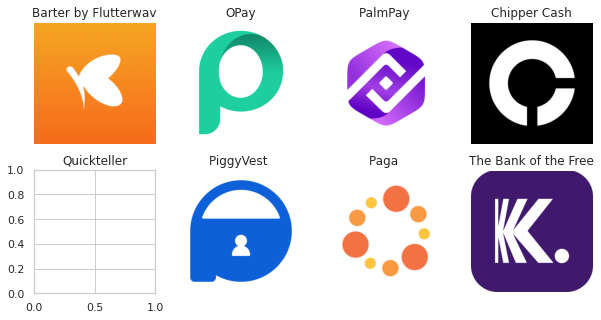

In [80]:
# plot the icons of the app
# filter the title of the apps
def filter_title(title):
  if title.find(':') != -1:
    sep_index = title.find(':')
  else:
    sep_index = title.find('-')
  if sep_index != -1:
    title = title[:sep_index]
  title = title[:20]
  return title


fig, axes = plt.subplots(2, len(app_package_id)//2, figsize = (10,5))
for id, ax in enumerate(axes.flat):
  ap = app_infos[id]
  try:
    ax.imshow(plt.imread(ap['icon']))
    ax.set_title(filter_title(ap['title']))
    ax.axis('off')
  except ValueError as error:
    ax.set_title(filter_title(ap['title']))
    pass



CREATE A DATAFRAME WITH THE INFO OF THE APPS

In [81]:
app_infos_df = pd.DataFrame(app_infos)
app_infos_df.head()

,title,description,descriptionHTML,summary,installs,minInstalls,realInstalls,score,ratings,reviews,...,contentRatingDescription,adSupported,containsAds,released,updated,version,recentChanges,recentChangesHTML,appId,url
0,Barter by Flutterwave,Manage your finances with barter. Barter is de...,Manage your finances with barter. Barter is de...,Manage your finances with Barter,"500,000+",500000,940491,3.691076,11177,4357,...,None,False,False,"Nov 7, 2018",1658149478,2.4.47,Bug fixes,Bug fixes,com.flutterwave.flybarter,https://play.google.com/store/apps/details?id=...
1,OPay,OPay - The first cashback wallet in Nigeria(A ...,OPay - The first cashback wallet in Nigeria(A ...,OPay is a tool for transfer money and payments,"10,000,000+",10000000,10003226,4.497704,209195,108650,...,None,False,False,"Jun 8, 2018",1658309999,4.39.3.51,None,None,team.opay.pay,https://play.google.com/store/apps/details?id=...
2,"PalmPay - Transfers, Bills",PalmPay is the rewarding way to make payments!...,PalmPay is the rewarding way to make payments!...,"Free bank transfers, get discount on airtime a...","5,000,000+",5000000,6770227,4.514586,190639,76020,...,None,False,False,"Sep 15, 2018",1658150750,3.9.2,Update your app to experience these exciting n...,Update your app to experience these exciting n...,com.transsnet.palmpay,https://play.google.com/store/apps/details?id=...
3,Chipper Cash,<center>Send and receive money the fast and ea...,<center>Send and receive money the fast and ea...,"Send & Receive money to, from, and across Afri...","5,000,000+",5000000,5083183,4.167352,71930,21774,...,None,False,False,"Jul 7, 2018",1658394436,1.10.10,Because routine maintenance is just as importa...,Because routine maintenance is just as importa...,com.chippercash,https://play.google.com/store/apps/details?id=...
4,Quickteller,The new improved Quickteller App is designed t...,The new improved Quickteller App is designed t...,Quickteller is designed to make your everyday ...,"1,000,000+",1000000,1011501,3.739130,3679,1882,...,None,True,True,"Mar 4, 2019",1657225016,1.0.36,Bug fixes and improvement,Bug fixes and improvement,com.quickteller.app,https://play.google.com/store/apps/details?id=...


In [82]:
# save dataframe to csv
app_infos_df.to_csv('apps_info.csv', index = False, header = False)

GET THE APP REVIEWS

In [ ]:
# since most of the reviews in the internet are imbalanced, I am going to scrape reviews with
# corresponding to ratings such as 1-2-3-4-5 in a balanced format
# I will take the twice value for neutral - 3 than the other values
# I will also be also be taking the Most Relevant and NEWEST

In [83]:
app_reviews = []
for ap in tqdm(app_package_id):
  for score in range(1, 6):
    for sort_order in [Sort.MOST_RELEVANT, Sort.NEWEST]:
      rvs, _ = reviews(
                ap,
                lang='en',
                country='us',
                sort = sort_order,
                count=500 if score == 3 else 250,
                filter_score_with = score   
            )
      for r in rvs:
        r['sortOrder'] = 'most_relevant' if sort_order == Sort.MOST_RELEVANT else 'newest'
        r['appId'] = ap
      app_reviews.extend(rvs)


100%|██████████| 8/8 [00:35<00:00,  4.39s/it]


In [84]:
len(app_reviews)

21932

In [85]:
print_json(app_reviews[0])

{
  "appId": "com.flutterwave.flybarter",
  "at": "2022-07-21 09:28:55",
  "content": "Useless and frustrated app in terms of customers care. My phone was stolen and I try changing my number which the features keep saying \"service is on available at the moment try again later\" for the past 3 months. I sent an email 3 months ago with no response and I sent another reminder a week ago, still no response. What's the features of customers service doing when you knew customers service are not going to solve your problems? I so hate this app for this weird act",
  "repliedAt": null,
  "replyContent": null,
  "reviewCreatedVersion": "2.4.47",
  "reviewId": "a77c9d14-63ef-47fb-b2ac-99cc82275943",
  "score": 1,
  "sortOrder": "most_relevant",
  "thumbsUpCount": 0,
  "userImage": "https://play-lh.googleusercontent.com/a-/AFdZuco3L-xlQln_MzTn9kGJx95KjzU77U48H8itwfs38A",
  "userName": "Meditation Relaxing Music Inspiration"
}



CONVERT APP_REVIEWS INTO DATAFRAME

In [86]:
app_reviews_df = pd.DataFrame(app_reviews)
app_reviews_df.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,sortOrder,appId
0,a77c9d14-63ef-47fb-b2ac-99cc82275943,Meditation Relaxing Music Inspiration,https://play-lh.googleusercontent.com/a-/AFdZu...,Useless and frustrated app in terms of custome...,1,0,2.4.47,2022-07-21 09:28:55,None,NaT,most_relevant,com.flutterwave.flybarter
1,a9fe019a-dbb5-4b85-9d9b-797479fbb7d2,mask angel,https://play-lh.googleusercontent.com/a-/AFdZu...,"Scammers, the lot of them. Don't download this...",1,17,2.4.45,2022-06-29 08:59:48,"Hello, we are so sorry for the inconvenience. ...",2022-07-01 16:31:33,most_relevant,com.flutterwave.flybarter
2,4c55f499-eb1b-4aec-ab8e-858902b60992,Fred Ronald,https://play-lh.googleusercontent.com/a/AItbvm...,"My experience hasn't been good,the app keeps l...",1,3,2.4.45,2022-07-20 18:57:04,"Hi Victor, this must have been a frustrating e...",2022-07-21 04:22:29,most_relevant,com.flutterwave.flybarter
3,db8cc164-107b-4024-81df-738ec37fd20d,Sweet Love,https://play-lh.googleusercontent.com/a/AItbvm...,Very annoying app ever. I signed up account an...,1,8,2.4.44,2022-06-04 22:29:25,"Hello, We apologise for the inconvenience caus...",2022-06-09 06:00:42,most_relevant,com.flutterwave.flybarter
4,52b105b4-77e0-4018-87dc-e66c9625790d,Prince Simeon.A,https://play-lh.googleusercontent.com/a-/AFdZu...,I thought the experience would be an awesome o...,1,1,2.4.44,2022-06-03 20:53:11,"Hi Prince, we are so sorry about your experien...",2022-06-09 04:30:57,most_relevant,com.flutterwave.flybarter


In [87]:
app_count = app_reviews_df.appId.value_counts()
app_count

team.opay.pay                3000
com.transsnet.palmpay        3000
com.chippercash              3000
com.piggybankng.piggy        3000
com.kudabank.app             3000
com.flutterwave.flybarter    2790
com.mypaga.customer          2186
com.quickteller.app          1956
Name: appId, dtype: int64

In [88]:
dict_app = {} 
for i in range(8):
  dict_app[app_package_id[i]] = name_of_fintech[i]
dict_app.values()

dict_values(['Flutter wave', 'Opay', 'Palm Pay', 'Chipper Cash', 'Interswitch', 'PiggyVest', 'Paga', 'Kuda bank'])

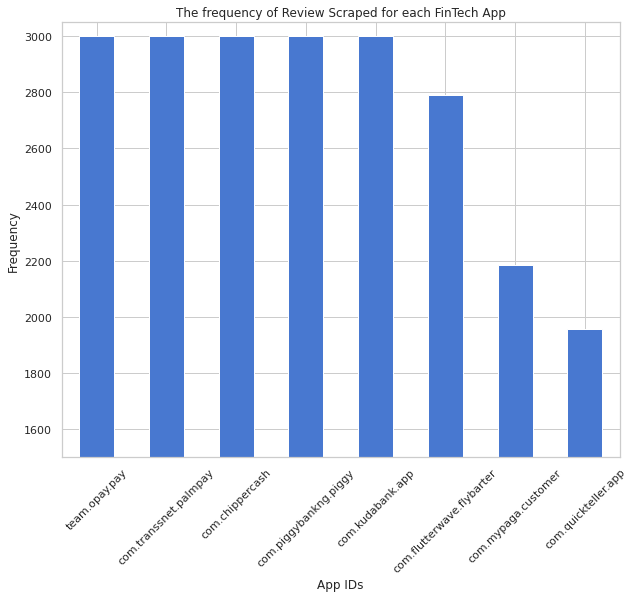

In [89]:
app_count.plot(
kind = 'bar',
rot = 45,
figsize = (10,8),
ylim = (1500, 3050),
title = 'The frequency of Review Scraped for each FinTech App',
xlabel = 'App IDs',
ylabel = 'Frequency'
)

In [90]:
# check the proportional of each ratings
rating_count = app_reviews_df.score.value_counts()
rating_count

3    6544
1    4000
5    4000
4    3882
2    3506
Name: score, dtype: int64

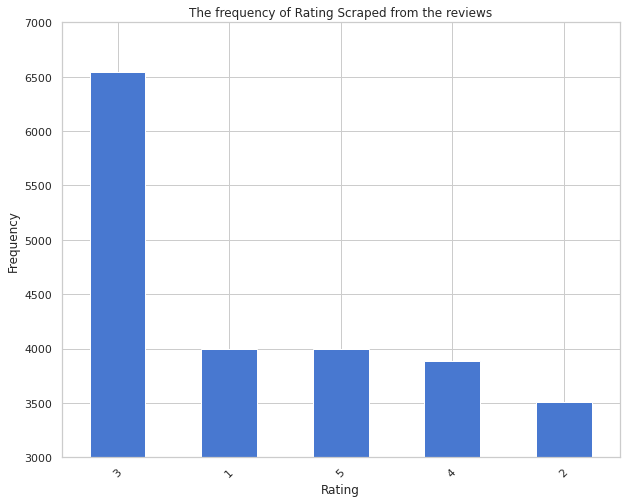

In [91]:
rating_count.plot(
kind = 'bar',
rot = 45,
figsize = (10,8),
ylim = (3000, 7000),
title = 'The frequency of Rating Scraped from the reviews',
ylabel = 'Frequency',
xlabel= 'Rating'
)

SAVE THE DATAFRAME INTO CSV FOR DOWNLOAD

In [92]:
# save dataframe to csv
app_reviews_df.to_csv('reviews.csv', index = False, header = True)